In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#(kilometers driven, year of manufacture, fuel type, transmission, and price

In [12]:
url = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Atata&sort=bestmatch&serveWarrantyCount=true&gaId=865958512.1725720467&listingSource=Homepage_Filters&storeCityId=2'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [13]:
import re
li_elements = soup.find_all('ul',class_='_3jRcd')
for le in li_elements:
    text = le.text

In [5]:
pattern = r'\d{1,3}(?:,\d{3})* km'
km_values = []
for le in li_elements:
    text = le.get_text()
    print("Full text from <ul>:", text)
    matches = re.findall(pattern, text)
    print("Matches found:", matches)
    km_values.extend(matches)
print("Extracted km values:", km_values)

Full text from <ul>: Spl. reg. no.27,990 kmDiesel1st owner
Matches found: ['27,990 km']
Full text from <ul>: Alloy wheels450 kmPetrol1st owner
Matches found: ['450 km']
Full text from <ul>: Reg. serviced6,657 kmPetrol1st owner
Matches found: ['6,657 km']
Full text from <ul>: Reg. serviced24,589 kmPetrol1st owner
Matches found: ['24,589 km']
Full text from <ul>: Reg. serviced85,552 kmPetrol1st owner
Matches found: ['85,552 km']
Full text from <ul>: Reg. serviced12,096 kmPetrol1st owner
Matches found: ['12,096 km']
Full text from <ul>: Alloy wheels22,894 kmPetrol1st owner
Matches found: ['22,894 km']
Full text from <ul>: Reg. serviced42,313 kmPetrol2nd owner
Matches found: ['42,313 km']
Full text from <ul>: Reg. serviced58,047 kmPetrol1st owner
Matches found: ['58,047 km']
Full text from <ul>: Reg. serviced14,178 kmCNG1st owner
Matches found: ['14,178 km']
Full text from <ul>: Reg. serviced21,955 kmPetrol1st owner
Matches found: ['21,955 km']
Full text from <ul>: Alloy wheels56,690 kmDie

In [6]:
km_values

['27,990 km',
 '450 km',
 '6,657 km',
 '24,589 km',
 '85,552 km',
 '12,096 km',
 '22,894 km',
 '42,313 km',
 '58,047 km',
 '14,178 km',
 '21,955 km',
 '56,690 km',
 '94,259 km',
 '52,276 km',
 '35,764 km',
 '30,203 km',
 '30,274 km',
 '8,119 km',
 '24,415 km',
 '02,235 km']

In [7]:
df = pd.DataFrame(km_values)
df.columns = ['Kilometers_driven']

In [8]:
df

,Kilometers_driven
0,"27,990 km"
1,450 km
2,"6,657 km"
3,"24,589 km"
4,"85,552 km"
5,"12,096 km"
6,"22,894 km"
7,"42,313 km"
8,"58,047 km"
9,"14,178 km"


In [9]:
year_of_manufacture = soup.find_all('h3',class_='_2Out2')
years_list = []
for year in year_of_manufacture:
    years = year.text
    res = years[0:4]
    years_list.append(res)
print(years_list)
    

['2022', '2022', '2023', '2022', '2021', '2023', '2022', '2020', '2020', '2023', '2022', '2019', '2018', '2020', '2018', '2021', '2020', '2021', '2023', '2017']


In [14]:
df

,Kilometers_driven
0,"27,990 km"
1,450 km
2,"6,657 km"
3,"24,589 km"
4,"85,552 km"
5,"12,096 km"
6,"22,894 km"
7,"42,313 km"
8,"58,047 km"
9,"14,178 km"


In [15]:
df['year_of_manufacture'] = years_list

In [16]:
df

,Kilometers_driven,year_of_manufacture
0,"27,990 km",2022
1,450 km,2022
2,"6,657 km",2023
3,"24,589 km",2022
4,"85,552 km",2021
5,"12,096 km",2023
6,"22,894 km",2022
7,"42,313 km",2020
8,"58,047 km",2020
9,"14,178 km",2023


In [17]:
import re
li_elements = soup.find_all('ul',class_='_3jRcd')
for le in li_elements:
    text = le.text
    pattern = r'(Diesel|Petrol)'
    fuel_types = []
    for le in li_elements:
        text = le.get_text()
        #print("Full text from <ul>:", text)
        matches = re.findall(pattern, text)
        #print("Matches found:", matches)
        fuel_types.extend(matches)
print(fuel_types)

['Diesel', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Petrol', 'Petrol', 'Petrol']


In [18]:
import numpy as np

# Extend fuel_types to match the length of the DataFrame
fuel_types.extend([np.nan] * (len(df) - len(fuel_types)))


In [19]:
df['fuel_types'] = fuel_types

In [20]:
df

,Kilometers_driven,year_of_manufacture,fuel_types
0,"27,990 km",2022,Diesel
1,450 km,2022,Petrol
2,"6,657 km",2023,Petrol
3,"24,589 km",2022,Petrol
4,"85,552 km",2021,Petrol
5,"12,096 km",2023,Petrol
6,"22,894 km",2022,Petrol
7,"42,313 km",2020,Petrol
8,"58,047 km",2020,Petrol
9,"14,178 km",2023,Petrol


In [21]:
prc = soup.find_all('strong',class_='_37WXy')
prc_list = []
for p in prc:
    #print(p.text)
    prc_list.append(p.text)
print(prc_list)

['₹15.52L', '₹8.46L', '₹5.36L', '₹7.28L', '₹6.07L', '₹6.05L', '₹9.41L', '₹4.56L', '₹5.90L', '₹7.39L', '₹6.77L', '₹10.60L', '₹3.84L', '₹7.08L', '₹4.21L', '₹15.95L', '₹5.95L', '₹8.58L', '₹9.69L', '₹3.74L']


In [22]:
df['Price'] = prc_list

In [23]:
df

,Kilometers_driven,year_of_manufacture,fuel_types,Price
0,"27,990 km",2022,Diesel,₹15.52L
1,450 km,2022,Petrol,₹8.46L
2,"6,657 km",2023,Petrol,₹5.36L
3,"24,589 km",2022,Petrol,₹7.28L
4,"85,552 km",2021,Petrol,₹6.07L
5,"12,096 km",2023,Petrol,₹6.05L
6,"22,894 km",2022,Petrol,₹9.41L
7,"42,313 km",2020,Petrol,₹4.56L
8,"58,047 km",2020,Petrol,₹5.90L
9,"14,178 km",2023,Petrol,₹7.39L


In [24]:
loc = soup.find_all('p',class_='_2rxhF')
loc_list = []
for l in loc:
    #print(l.text)
    #print(l.text[29:])
    loc_list.append(l.text[29:])
print(loc_list)    

[' Urbana, Golf Course Ext., Gurugram ', 'atarpur, Delhi ', ' Urbana, Golf Course Ext., Gurugram ', 'ro Walk, Rohini, New Delhi ', 'tor-18, Noida ', ' Urbana, Golf Course Ext., Gurugram ', 'atarpur, Delhi ', ' Urbana, Golf Course Ext., Gurugram ', 'ro Walk, Rohini, New Delhi ', 'tor-18, Noida ', 'tor-18, Noida ', 'svnath City Mall, Faridabad ', 'shali, Ghaziabad ', 'ro Walk, Rohini, New Delhi ', 'ro Walk, Rohini, New Delhi ', 'tor-18, Noida ', 'tor-18, Noida ', 'atarpur, Delhi ', 'ro Walk, Rohini, New Delhi ', 'shali, Ghaziabad ']


In [25]:
df['Location'] = loc_list

In [26]:
df

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram"
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi"
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram"
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi"
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida"
5,"12,096 km",2023,Petrol,₹6.05L,"Urbana, Golf Course Ext., Gurugram"
6,"22,894 km",2022,Petrol,₹9.41L,"atarpur, Delhi"
7,"42,313 km",2020,Petrol,₹4.56L,"Urbana, Golf Course Ext., Gurugram"
8,"58,047 km",2020,Petrol,₹5.90L,"ro Walk, Rohini, New Delhi"
9,"14,178 km",2023,Petrol,₹7.39L,"tor-18, Noida"


In [27]:
df

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram"
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi"
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram"
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi"
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida"
5,"12,096 km",2023,Petrol,₹6.05L,"Urbana, Golf Course Ext., Gurugram"
6,"22,894 km",2022,Petrol,₹9.41L,"atarpur, Delhi"
7,"42,313 km",2020,Petrol,₹4.56L,"Urbana, Golf Course Ext., Gurugram"
8,"58,047 km",2020,Petrol,₹5.90L,"ro Walk, Rohini, New Delhi"
9,"14,178 km",2023,Petrol,₹7.39L,"tor-18, Noida"


In [ ]:
df = df.drop(columns=['Make'],axis=1)

In [28]:
df

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram"
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi"
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram"
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi"
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida"
5,"12,096 km",2023,Petrol,₹6.05L,"Urbana, Golf Course Ext., Gurugram"
6,"22,894 km",2022,Petrol,₹9.41L,"atarpur, Delhi"
7,"42,313 km",2020,Petrol,₹4.56L,"Urbana, Golf Course Ext., Gurugram"
8,"58,047 km",2020,Petrol,₹5.90L,"ro Walk, Rohini, New Delhi"
9,"14,178 km",2023,Petrol,₹7.39L,"tor-18, Noida"


In [37]:
t = soup.find_all('h3',class_='_2Out2')
trans_list = []
for i in t:
    res = i.text.split()
    ans = res[3:]
    join = ' '.join(ans)
    trans_list.append(join)
print(trans_list)
    

['XT PLUS 2.0L KRYOTEC DARK EDITON', 'CREATIVE 1.2 RTN DUAL TONE', 'XE PETROL', 'ACCOMPLISHED AMT CAMO EDITION', 'XT PETROL', 'XM PETROL', 'XZ PLUS PETROL', 'XZ PETROL', 'XT PETROL', 'XM CNG', 'ACCOMPLISHED MT', 'XZ 2.0L DARK EDITION', 'XT PETROL', 'XM SUNROOF DIESEL', 'NRG PETROL', 'XZ', 'XZ PETROL', 'XZ PETROL', 'XZ PLUS PETROL SUNROOF', 'XTA PETROL']


In [38]:
df['Transmission'] = trans_list

In [39]:
df

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram",XT PLUS 2.0L KRYOTEC DARK EDITON
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi",CREATIVE 1.2 RTN DUAL TONE
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram",XE PETROL
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi",ACCOMPLISHED AMT CAMO EDITION
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida",XT PETROL
5,"12,096 km",2023,Petrol,₹6.05L,"Urbana, Golf Course Ext., Gurugram",XM PETROL
6,"22,894 km",2022,Petrol,₹9.41L,"atarpur, Delhi",XZ PLUS PETROL
7,"42,313 km",2020,Petrol,₹4.56L,"Urbana, Golf Course Ext., Gurugram",XZ PETROL
8,"58,047 km",2020,Petrol,₹5.90L,"ro Walk, Rohini, New Delhi",XT PETROL
9,"14,178 km",2023,Petrol,₹7.39L,"tor-18, Noida",XM CNG


In [44]:
t = soup.find_all('h3',class_='_2Out2')
Make_list = []
for i in t:
    res = i.text.split()
    ans = res[1]
    join = ''.join(ans)
    Make_list.append(join)
print(Make_list)
    

['Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata']


In [45]:
df['Make'] = Make_list

In [47]:
t = soup.find_all('h3',class_='_2Out2')
Model_list = []
for i in t:
    res = i.text.split()
    ans = res[2]
    join = ''.join(ans)
    Model_list.append(join)
print(Model_list)
    

['Harrier', 'PUNCH', 'Tiago', 'PUNCH', 'ALTROZ', 'TIGOR', 'NEXON', 'Tiago', 'ALTROZ', 'TIGOR', 'PUNCH', 'Harrier', 'Tiago', 'NEXON', 'TIAGO', 'Safari', 'ALTROZ', 'NEXON', 'NEXON', 'Tiago']


In [48]:
df['Model'] = Model_list

In [49]:
df

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make,Model
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram",XT PLUS 2.0L KRYOTEC DARK EDITON,Tata,Harrier
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi",CREATIVE 1.2 RTN DUAL TONE,Tata,PUNCH
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram",XE PETROL,Tata,Tiago
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi",ACCOMPLISHED AMT CAMO EDITION,Tata,PUNCH
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida",XT PETROL,Tata,ALTROZ
5,"12,096 km",2023,Petrol,₹6.05L,"Urbana, Golf Course Ext., Gurugram",XM PETROL,Tata,TIGOR
6,"22,894 km",2022,Petrol,₹9.41L,"atarpur, Delhi",XZ PLUS PETROL,Tata,NEXON
7,"42,313 km",2020,Petrol,₹4.56L,"Urbana, Golf Course Ext., Gurugram",XZ PETROL,Tata,Tiago
8,"58,047 km",2020,Petrol,₹5.90L,"ro Walk, Rohini, New Delhi",XT PETROL,Tata,ALTROZ
9,"14,178 km",2023,Petrol,₹7.39L,"tor-18, Noida",XM CNG,Tata,TIGOR


In [70]:
url1 = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Avolkswagen&sort=bestmatch&serveWarrantyCount=true&gaId=865958512.1725720467&listingSource=Search_LP&storeCityId=5'
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.text, 'html.parser')

In [71]:
import re
ul_elements = soup1.find_all('ul',class_='_3jRcd')
for ul in ul_elements:
    d = ul.text
    print(d)


Top Model9,083 kmPetrol1st owner
Reg. serviced27,653 kmPetrol1st owner
Spl. reg. no.32,473 kmPetrol1st owner
Safety specs.67,835 kmPetrol2nd owner
Reg. serviced68,763 kmPetrol1st owner
Top Model40,904 kmPetrol1st owner
Top Model43,444 kmPetrol1st owner
Top Model1,06,608 kmPetrol1st owner
Top Model58,082 kmPetrol1st owner
Top Model30,877 kmPetrol1st owner
100% tyre life96,717 kmPetrol2nd owner
Safety specs.54,692 kmDiesel1st owner
Top Model80,307 kmPetrol1st owner
Top Model58,784 kmPetrol1st owner
Top Model43,316 kmPetrol2nd owner
Top Model62,935 kmPetrol1st owner


In [73]:
pat = r'\d{1,3}(?:,\d{3})* km'
km_values = []
for ul in ul_elements:
    texts = ul.get_text()
    print("Full text from <ul>:", texts)
    match = re.findall(pat, texts)
    print("Matches found:", match)
    km_values.extend(match)
print("Extracted km values:", km_values)

Full text from <ul>: Top Model9,083 kmPetrol1st owner
Matches found: ['9,083 km']
Full text from <ul>: Reg. serviced27,653 kmPetrol1st owner
Matches found: ['27,653 km']
Full text from <ul>: Spl. reg. no.32,473 kmPetrol1st owner
Matches found: ['32,473 km']
Full text from <ul>: Safety specs.67,835 kmPetrol2nd owner
Matches found: ['67,835 km']
Full text from <ul>: Reg. serviced68,763 kmPetrol1st owner
Matches found: ['68,763 km']
Full text from <ul>: Top Model40,904 kmPetrol1st owner
Matches found: ['40,904 km']
Full text from <ul>: Top Model43,444 kmPetrol1st owner
Matches found: ['43,444 km']
Full text from <ul>: Top Model1,06,608 kmPetrol1st owner
Matches found: ['06,608 km']
Full text from <ul>: Top Model58,082 kmPetrol1st owner
Matches found: ['58,082 km']
Full text from <ul>: Top Model30,877 kmPetrol1st owner
Matches found: ['30,877 km']
Full text from <ul>: 100% tyre life96,717 kmPetrol2nd owner
Matches found: ['96,717 km']
Full text from <ul>: Safety specs.54,692 kmDiesel1st ow

In [74]:
df1 = pd.DataFrame(km_values)
df1.columns = ['Kilometers_driven']

In [75]:
df1

,Kilometers_driven
0,"9,083 km"
1,"27,653 km"
2,"32,473 km"
3,"67,835 km"
4,"68,763 km"
5,"40,904 km"
6,"43,444 km"
7,"06,608 km"
8,"58,082 km"
9,"30,877 km"


In [76]:
year_of_manufacture = soup1.find_all('h3',class_='_2Out2')
years_list = []
for year in year_of_manufacture:
    years = year.text
    res = years[0:4]
    years_list.append(res)
print(years_list)
    

['2023', '2022', '2020', '2017', '2019', '2018', '2020', '2018', '2019', '2019', '2018', '2019', '2016', '2016', '2017', '2016']


In [77]:
df1['year_of_manufacture'] = years_list

In [78]:
df1

,Kilometers_driven,year_of_manufacture
0,"9,083 km",2023
1,"27,653 km",2022
2,"32,473 km",2020
3,"67,835 km",2017
4,"68,763 km",2019
5,"40,904 km",2018
6,"43,444 km",2020
7,"06,608 km",2018
8,"58,082 km",2019
9,"30,877 km",2019


In [79]:
import re
li_elements = soup1.find_all('ul',class_='_3jRcd')
for le in li_elements:
    text = le.text
    pattern = r'(Diesel|Petrol)'
    fuel_types = []
    for le in li_elements:
        text = le.get_text()
        #print("Full text from <ul>:", text)
        matches = re.findall(pattern, text)
        #print("Matches found:", matches)
        fuel_types.extend(matches)
print(fuel_types)

['Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Diesel', 'Petrol', 'Petrol', 'Petrol', 'Petrol']


In [88]:
import numpy as np

# Extend fuel_types to match the length of the DataFrame
fuel_types.extend([np.nan] * (len(df1) - len(fuel_types)))


In [89]:
# Truncate or extend `fuel_types` to match `df1` length
if len(fuel_types) > len(df1):
    fuel_types = fuel_types[:len(df1)]
elif len(fuel_types) < len(df1):
    fuel_types.extend([None] * (len(df1) - len(fuel_types)))

# Now you can safely assign
df1['fuel_types'] = fuel_types


In [90]:
df1

,Kilometers_driven,year_of_manufacture,fuel_types
0,"9,083 km",2023,Petrol
1,"27,653 km",2022,Petrol
2,"32,473 km",2020,Petrol
3,"67,835 km",2017,Petrol
4,"68,763 km",2019,Petrol
5,"40,904 km",2018,Petrol
6,"43,444 km",2020,Petrol
7,"06,608 km",2018,Petrol
8,"58,082 km",2019,Petrol
9,"30,877 km",2019,Petrol


In [91]:
prc = soup1.find_all('strong',class_='_37WXy')
prc_list = []
for p in prc:
    #print(p.text)
    prc_list.append(p.text)
print(prc_list)

['₹13.83L', '₹9.18L', '₹5.23L', '₹3.76L', '₹5.50L', '₹4.71L', '₹9.97L', '₹6.86L', '₹9.25L', '₹11.00L', '₹4.88L', '₹5.04L', '₹4.97L', '₹5.62L', '₹5.90L', '₹4.09L']


In [92]:
df1['Price'] = prc_list

In [93]:
df1

,Kilometers_driven,year_of_manufacture,fuel_types,Price
0,"9,083 km",2023,Petrol,₹13.83L
1,"27,653 km",2022,Petrol,₹9.18L
2,"32,473 km",2020,Petrol,₹5.23L
3,"67,835 km",2017,Petrol,₹3.76L
4,"68,763 km",2019,Petrol,₹5.50L
5,"40,904 km",2018,Petrol,₹4.71L
6,"43,444 km",2020,Petrol,₹9.97L
7,"06,608 km",2018,Petrol,₹6.86L
8,"58,082 km",2019,Petrol,₹9.25L
9,"30,877 km",2019,Petrol,₹11.00L


In [94]:
loc = soup1.find_all('p',class_='_2rxhF')
loc_list = []
for l in loc:
    #print(l.text)
    #print(l.text[29:])
    loc_list.append(l.text[29:])
print(loc_list)    

[' Urbana, Golf Course Ext., Gurugram ', 'atarpur, Delhi ', ' Urbana, Golf Course Ext., Gurugram ', 'atarpur, Delhi ', 'tor-18, Noida ', 'atarpur, Delhi ', 'atarpur, Delhi ', 'ro Walk, Rohini, New Delhi ', 'svnath City Mall, Faridabad ', 'Delhi 6, Raj Nagar Extension, Ghaziabad ', 'ro Walk, Rohini, New Delhi ', 'tor-18, Noida ', 'tor-18, Noida ', 'tor-18, Noida ', 'tor-18, Noida ', 'ro Walk, Rohini, New Delhi ']


In [95]:
df1['Location'] = loc_list

In [96]:
df1

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location
0,"9,083 km",2023,Petrol,₹13.83L,"Urbana, Golf Course Ext., Gurugram"
1,"27,653 km",2022,Petrol,₹9.18L,"atarpur, Delhi"
2,"32,473 km",2020,Petrol,₹5.23L,"Urbana, Golf Course Ext., Gurugram"
3,"67,835 km",2017,Petrol,₹3.76L,"atarpur, Delhi"
4,"68,763 km",2019,Petrol,₹5.50L,"tor-18, Noida"
5,"40,904 km",2018,Petrol,₹4.71L,"atarpur, Delhi"
6,"43,444 km",2020,Petrol,₹9.97L,"atarpur, Delhi"
7,"06,608 km",2018,Petrol,₹6.86L,"ro Walk, Rohini, New Delhi"
8,"58,082 km",2019,Petrol,₹9.25L,"svnath City Mall, Faridabad"
9,"30,877 km",2019,Petrol,₹11.00L,"Delhi 6, Raj Nagar Extension, Ghaziabad"


In [97]:
t = soup1.find_all('h3',class_='_2Out2')
trans_list = []
for i in t:
    res = i.text.split()
    ans = res[3:]
    join = ' '.join(ans)
    trans_list.append(join)
print(trans_list)
    

['HIGHLINE TSI 1.0 AT', 'COMFORTLINE TSI 1.0 MT', 'TRENDLINE 1.0L', 'TRENDLINE 1.2L', 'COMFORTLINE 1.0L MPI', 'HIGHLINE PLUS 1.0L 16 ALLOY', 'HIGHLINE PLUS 1.0L TSI', 'HIGHLINE PLUS 1.2 AT 16 ALLOY', 'HIGHLINE PLUS 1.2 AT 16 ALLOY', 'HIGHLINE PLUS 1.2 AT', 'COMFORTLINE 1.0L MPI', 'TRENDLINE 1.5L', 'HIGHLINE PETROL AT', 'HIGHLINE 1.6 MPI', 'HIGHLINE PLUS 1.2 AT 16 ALLOY', 'HIGHLINE1.2L']


In [98]:
df1['Transmission'] = trans_list

In [99]:
df1

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission
0,"9,083 km",2023,Petrol,₹13.83L,"Urbana, Golf Course Ext., Gurugram",HIGHLINE TSI 1.0 AT
1,"27,653 km",2022,Petrol,₹9.18L,"atarpur, Delhi",COMFORTLINE TSI 1.0 MT
2,"32,473 km",2020,Petrol,₹5.23L,"Urbana, Golf Course Ext., Gurugram",TRENDLINE 1.0L
3,"67,835 km",2017,Petrol,₹3.76L,"atarpur, Delhi",TRENDLINE 1.2L
4,"68,763 km",2019,Petrol,₹5.50L,"tor-18, Noida",COMFORTLINE 1.0L MPI
5,"40,904 km",2018,Petrol,₹4.71L,"atarpur, Delhi",HIGHLINE PLUS 1.0L 16 ALLOY
6,"43,444 km",2020,Petrol,₹9.97L,"atarpur, Delhi",HIGHLINE PLUS 1.0L TSI
7,"06,608 km",2018,Petrol,₹6.86L,"ro Walk, Rohini, New Delhi",HIGHLINE PLUS 1.2 AT 16 ALLOY
8,"58,082 km",2019,Petrol,₹9.25L,"svnath City Mall, Faridabad",HIGHLINE PLUS 1.2 AT 16 ALLOY
9,"30,877 km",2019,Petrol,₹11.00L,"Delhi 6, Raj Nagar Extension, Ghaziabad",HIGHLINE PLUS 1.2 AT


In [100]:
t = soup1.find_all('h3',class_='_2Out2')
Make_list = []
for i in t:
    res = i.text.split()
    ans = res[1]
    join = ''.join(ans)
    Make_list.append(join)
print(Make_list)
    

['Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen', 'Volkswagen']


In [101]:
df1['Make'] = Make_list

In [102]:
df1

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make
0,"9,083 km",2023,Petrol,₹13.83L,"Urbana, Golf Course Ext., Gurugram",HIGHLINE TSI 1.0 AT,Volkswagen
1,"27,653 km",2022,Petrol,₹9.18L,"atarpur, Delhi",COMFORTLINE TSI 1.0 MT,Volkswagen
2,"32,473 km",2020,Petrol,₹5.23L,"Urbana, Golf Course Ext., Gurugram",TRENDLINE 1.0L,Volkswagen
3,"67,835 km",2017,Petrol,₹3.76L,"atarpur, Delhi",TRENDLINE 1.2L,Volkswagen
4,"68,763 km",2019,Petrol,₹5.50L,"tor-18, Noida",COMFORTLINE 1.0L MPI,Volkswagen
5,"40,904 km",2018,Petrol,₹4.71L,"atarpur, Delhi",HIGHLINE PLUS 1.0L 16 ALLOY,Volkswagen
6,"43,444 km",2020,Petrol,₹9.97L,"atarpur, Delhi",HIGHLINE PLUS 1.0L TSI,Volkswagen
7,"06,608 km",2018,Petrol,₹6.86L,"ro Walk, Rohini, New Delhi",HIGHLINE PLUS 1.2 AT 16 ALLOY,Volkswagen
8,"58,082 km",2019,Petrol,₹9.25L,"svnath City Mall, Faridabad",HIGHLINE PLUS 1.2 AT 16 ALLOY,Volkswagen
9,"30,877 km",2019,Petrol,₹11.00L,"Delhi 6, Raj Nagar Extension, Ghaziabad",HIGHLINE PLUS 1.2 AT,Volkswagen


In [103]:
t = soup1.find_all('h3',class_='_2Out2')
Model_list = []
for i in t:
    res = i.text.split()
    ans = res[2]
    join = ''.join(ans)
    Model_list.append(join)
print(Model_list)
    

['VIRTUS', 'VIRTUS', 'Polo', 'Ameo', 'Polo', 'Ameo', 'Vento', 'Vento', 'Vento', 'Vento', 'Polo', 'Ameo', 'Vento', 'Vento', 'Vento', 'Ameo']


In [104]:
df1['Model'] = Model_list

In [105]:
df1

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make,Model
0,"9,083 km",2023,Petrol,₹13.83L,"Urbana, Golf Course Ext., Gurugram",HIGHLINE TSI 1.0 AT,Volkswagen,VIRTUS
1,"27,653 km",2022,Petrol,₹9.18L,"atarpur, Delhi",COMFORTLINE TSI 1.0 MT,Volkswagen,VIRTUS
2,"32,473 km",2020,Petrol,₹5.23L,"Urbana, Golf Course Ext., Gurugram",TRENDLINE 1.0L,Volkswagen,Polo
3,"67,835 km",2017,Petrol,₹3.76L,"atarpur, Delhi",TRENDLINE 1.2L,Volkswagen,Ameo
4,"68,763 km",2019,Petrol,₹5.50L,"tor-18, Noida",COMFORTLINE 1.0L MPI,Volkswagen,Polo
5,"40,904 km",2018,Petrol,₹4.71L,"atarpur, Delhi",HIGHLINE PLUS 1.0L 16 ALLOY,Volkswagen,Ameo
6,"43,444 km",2020,Petrol,₹9.97L,"atarpur, Delhi",HIGHLINE PLUS 1.0L TSI,Volkswagen,Vento
7,"06,608 km",2018,Petrol,₹6.86L,"ro Walk, Rohini, New Delhi",HIGHLINE PLUS 1.2 AT 16 ALLOY,Volkswagen,Vento
8,"58,082 km",2019,Petrol,₹9.25L,"svnath City Mall, Faridabad",HIGHLINE PLUS 1.2 AT 16 ALLOY,Volkswagen,Vento
9,"30,877 km",2019,Petrol,₹11.00L,"Delhi 6, Raj Nagar Extension, Ghaziabad",HIGHLINE PLUS 1.2 AT,Volkswagen,Vento


In [106]:
df

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make,Model
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram",XT PLUS 2.0L KRYOTEC DARK EDITON,Tata,Harrier
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi",CREATIVE 1.2 RTN DUAL TONE,Tata,PUNCH
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram",XE PETROL,Tata,Tiago
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi",ACCOMPLISHED AMT CAMO EDITION,Tata,PUNCH
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida",XT PETROL,Tata,ALTROZ
5,"12,096 km",2023,Petrol,₹6.05L,"Urbana, Golf Course Ext., Gurugram",XM PETROL,Tata,TIGOR
6,"22,894 km",2022,Petrol,₹9.41L,"atarpur, Delhi",XZ PLUS PETROL,Tata,NEXON
7,"42,313 km",2020,Petrol,₹4.56L,"Urbana, Golf Course Ext., Gurugram",XZ PETROL,Tata,Tiago
8,"58,047 km",2020,Petrol,₹5.90L,"ro Walk, Rohini, New Delhi",XT PETROL,Tata,ALTROZ
9,"14,178 km",2023,Petrol,₹7.39L,"tor-18, Noida",XM CNG,Tata,TIGOR


In [107]:
new_df = pd.concat([df, df1], ignore_index=True)

In [108]:
new_df

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make,Model
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram",XT PLUS 2.0L KRYOTEC DARK EDITON,Tata,Harrier
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi",CREATIVE 1.2 RTN DUAL TONE,Tata,PUNCH
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram",XE PETROL,Tata,Tiago
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi",ACCOMPLISHED AMT CAMO EDITION,Tata,PUNCH
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida",XT PETROL,Tata,ALTROZ
5,"12,096 km",2023,Petrol,₹6.05L,"Urbana, Golf Course Ext., Gurugram",XM PETROL,Tata,TIGOR
6,"22,894 km",2022,Petrol,₹9.41L,"atarpur, Delhi",XZ PLUS PETROL,Tata,NEXON
7,"42,313 km",2020,Petrol,₹4.56L,"Urbana, Golf Course Ext., Gurugram",XZ PETROL,Tata,Tiago
8,"58,047 km",2020,Petrol,₹5.90L,"ro Walk, Rohini, New Delhi",XT PETROL,Tata,ALTROZ
9,"14,178 km",2023,Petrol,₹7.39L,"tor-18, Noida",XM CNG,Tata,TIGOR


In [109]:
url2 = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Aford&sort=bestmatch&serveWarrantyCount=true&gaId=865958512.1725720467&listingSource=Search_LP&storeCityId=5'
response2 = requests.get(url2)
soup2 = BeautifulSoup(response2.text, 'html.parser')

In [110]:
import re
ul_elements = soup2.find_all('ul',class_='_3jRcd')
for ul in ul_elements:
    d = ul.text
    print(d)


Top Model58,503 kmPetrol1st owner
Alloy wheels66,584 kmPetrol1st owner
Top Model55,694 kmPetrol2nd owner
Top Model96,134 kmDiesel2nd owner
Top Model27,603 kmDiesel3rd owner
Top Model49,417 kmDiesel1st owner
Top Model39,275 kmPetrol1st owner
Top Model78,701 kmDiesel1st owner
Top Model71,807 kmDiesel2nd owner
Reg. serviced75,985 kmPetrol1st owner
Alloy wheels16,708 kmPetrol2nd owner
Top Model58,384 kmPetrol2nd owner
Top Model92,575 kmPetrol1st owner
Top Model98,296 kmPetrol2nd owner
Top Model68,051 kmDiesel1st owner
Top Model67,602 kmPetrol3rd owner
Reg. serviced66,016 kmPetrol1st owner
100% tyre life79,269 kmPetrol1st owner
100% tyre life65,194 kmPetrol1st owner
Top Model23,358 kmDiesel1st owner


In [111]:
pat = r'\d{1,3}(?:,\d{3})* km'
km_values = []
for ul in ul_elements:
    texts = ul.get_text()
    print("Full text from <ul>:", texts)
    match = re.findall(pat, texts)
    print("Matches found:", match)
    km_values.extend(match)
print("Extracted km values:", km_values)

Full text from <ul>: Top Model58,503 kmPetrol1st owner
Matches found: ['58,503 km']
Full text from <ul>: Alloy wheels66,584 kmPetrol1st owner
Matches found: ['66,584 km']
Full text from <ul>: Top Model55,694 kmPetrol2nd owner
Matches found: ['55,694 km']
Full text from <ul>: Top Model96,134 kmDiesel2nd owner
Matches found: ['96,134 km']
Full text from <ul>: Top Model27,603 kmDiesel3rd owner
Matches found: ['27,603 km']
Full text from <ul>: Top Model49,417 kmDiesel1st owner
Matches found: ['49,417 km']
Full text from <ul>: Top Model39,275 kmPetrol1st owner
Matches found: ['39,275 km']
Full text from <ul>: Top Model78,701 kmDiesel1st owner
Matches found: ['78,701 km']
Full text from <ul>: Top Model71,807 kmDiesel2nd owner
Matches found: ['71,807 km']
Full text from <ul>: Reg. serviced75,985 kmPetrol1st owner
Matches found: ['75,985 km']
Full text from <ul>: Alloy wheels16,708 kmPetrol2nd owner
Matches found: ['16,708 km']
Full text from <ul>: Top Model58,384 kmPetrol2nd owner
Matches fou

In [112]:
df2 = pd.DataFrame(km_values)
df2.columns = ['Kilometers_driven']

In [113]:
df2

,Kilometers_driven
0,"58,503 km"
1,"66,584 km"
2,"55,694 km"
3,"96,134 km"
4,"27,603 km"
5,"49,417 km"
6,"39,275 km"
7,"78,701 km"
8,"71,807 km"
9,"75,985 km"


In [114]:
year_of_manufacture = soup2.find_all('h3',class_='_2Out2')
years_list = []
for year in year_of_manufacture:
    years = year.text
    res = years[0:4]
    years_list.append(res)
print(years_list)
    

['2019', '2018', '2015', '2018', '2019', '2019', '2018', '2019', '2020', '2018', '2021', '2019', '2016', '2019', '2019', '2017', '2017', '2013', '2015', '2021']


In [115]:
df2['year_of_manufacture'] = years_list

In [116]:
df2

,Kilometers_driven,year_of_manufacture
0,"58,503 km",2019
1,"66,584 km",2018
2,"55,694 km",2015
3,"96,134 km",2018
4,"27,603 km",2019
5,"49,417 km",2019
6,"39,275 km",2018
7,"78,701 km",2019
8,"71,807 km",2020
9,"75,985 km",2018


In [117]:
import re
li_elements = soup2.find_all('ul',class_='_3jRcd')
for le in li_elements:
    text = le.text
    pattern = r'(Diesel|Petrol)'
    fuel_types = []
    for le in li_elements:
        text = le.get_text()
        #print("Full text from <ul>:", text)
        matches = re.findall(pattern, text)
        #print("Matches found:", matches)
        fuel_types.extend(matches)
print(fuel_types)

['Petrol', 'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Diesel', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Diesel']


In [120]:
import numpy as np

# Extend fuel_types to match the length of the DataFrame
fuel_types.extend([np.nan] * (len(df2) - len(fuel_types)))


In [122]:
# Truncate or extend `fuel_types` to match `df1` length
if len(fuel_types) > len(df2):
    fuel_types = fuel_types[:len(df2)]
elif len(fuel_types) < len(df2):
    fuel_types.extend([None] * (len(df2) - len(fuel_types)))

# Now you can safely assign
df2['fuel_types'] = fuel_types


In [123]:
df2

,Kilometers_driven,year_of_manufacture,fuel_types
0,"58,503 km",2019,Petrol
1,"66,584 km",2018,Petrol
2,"55,694 km",2015,Petrol
3,"96,134 km",2018,Diesel
4,"27,603 km",2019,Diesel
5,"49,417 km",2019,Diesel
6,"39,275 km",2018,Petrol
7,"78,701 km",2019,Diesel
8,"71,807 km",2020,Diesel
9,"75,985 km",2018,Petrol


In [124]:
prc = soup2.find_all('strong',class_='_37WXy')
prc_list = []
for p in prc:
    #print(p.text)
    prc_list.append(p.text)
print(prc_list)

['₹7.66L', '₹4.95L', '₹4.57L', '₹5.93L', '₹6.70L', '₹6.73L', '₹7.00L', '₹7.09L', '₹7.57L', '₹6.61L', '₹5.34L', '₹7.70L', '₹5.17L', '₹6.22L', '₹7.03L', '₹5.55L', '₹5.50L', '₹3.30L', '₹4.09L', '₹8.88L']


In [125]:
df2['Price'] =prc_list

In [126]:
df2

,Kilometers_driven,year_of_manufacture,fuel_types,Price
0,"58,503 km",2019,Petrol,₹7.66L
1,"66,584 km",2018,Petrol,₹4.95L
2,"55,694 km",2015,Petrol,₹4.57L
3,"96,134 km",2018,Diesel,₹5.93L
4,"27,603 km",2019,Diesel,₹6.70L
5,"49,417 km",2019,Diesel,₹6.73L
6,"39,275 km",2018,Petrol,₹7.00L
7,"78,701 km",2019,Diesel,₹7.09L
8,"71,807 km",2020,Diesel,₹7.57L
9,"75,985 km",2018,Petrol,₹6.61L


In [127]:
loc = soup2.find_all('p',class_='_2rxhF')
loc_list = []
for l in loc:
    #print(l.text)
    #print(l.text[29:])
    loc_list.append(l.text[29:])
print(loc_list)    

['ro Walk, Rohini, New Delhi ', ' Urbana, Golf Course Ext., Gurugram ', 'ro Walk, Rohini, New Delhi ', ' Urbana, Golf Course Ext., Gurugram ', 'ro Walk, Rohini, New Delhi ', 'ro Walk, Rohini, New Delhi ', 'ro Walk, Rohini, New Delhi ', 'tor-18, Noida ', 'svnath City Mall, Faridabad ', 'ro Walk, Rohini, New Delhi ', 'atarpur, Delhi ', 'atarpur, Delhi ', 'tor-18, Noida ', 'tor-18, Noida ', ' Urbana, Golf Course Ext., Gurugram ', 'svnath City Mall, Faridabad ', ' Urbana, Golf Course Ext., Gurugram ', 'ro Walk, Rohini, New Delhi ', 'ro Walk, Rohini, New Delhi ', 'tor-18, Noida ']


In [128]:
df2['Location'] = loc_list

In [129]:
df2

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location
0,"58,503 km",2019,Petrol,₹7.66L,"ro Walk, Rohini, New Delhi"
1,"66,584 km",2018,Petrol,₹4.95L,"Urbana, Golf Course Ext., Gurugram"
2,"55,694 km",2015,Petrol,₹4.57L,"ro Walk, Rohini, New Delhi"
3,"96,134 km",2018,Diesel,₹5.93L,"Urbana, Golf Course Ext., Gurugram"
4,"27,603 km",2019,Diesel,₹6.70L,"ro Walk, Rohini, New Delhi"
5,"49,417 km",2019,Diesel,₹6.73L,"ro Walk, Rohini, New Delhi"
6,"39,275 km",2018,Petrol,₹7.00L,"ro Walk, Rohini, New Delhi"
7,"78,701 km",2019,Diesel,₹7.09L,"tor-18, Noida"
8,"71,807 km",2020,Diesel,₹7.57L,"svnath City Mall, Faridabad"
9,"75,985 km",2018,Petrol,₹6.61L,"ro Walk, Rohini, New Delhi"


In [130]:
t = soup2.find_all('h3',class_='_2Out2')
trans_list = []
for i in t:
    res = i.text.split()
    ans = res[3:]
    join = ' '.join(ans)
    trans_list.append(join)
print(trans_list)
    

['TITANIUM + 1.5L PETROL AT', 'TITANIUM PLUS 1.2 PETROL', 'TITANIUM 1.5L PETROL AT', 'TITANIUM + 1.5L DIESEL', 'TITANIUM 1.5L DIESEL', 'TITANIUM 1.5L DIESEL', 'TITANIUM 1.5L PETROL', 'TITANIUM 1.5L DIESEL', 'TITANIUM 1.5L THUNDER EDTION DIESEL', 'TREND + 1.5L PETROL AT', 'TITANIUM 1.2 PETROL', 'TITANIUM + 1.5L PETROL AT', 'TITANIUM 1.5L PETROL', 'TITANIUM 1.5L PETROL', 'TITANIUM 1.5L DIESEL', 'TITANIUM 1.5L PETROL AT', 'TITANIUM 1.5L PETROL', 'TREND 1.5L PETROL', 'AMBIENTE 1.5L PETROL', 'TITANIUM 1.5L DIESEL']


In [131]:
df2['Transmission'] = trans_list

In [132]:
df2

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission
0,"58,503 km",2019,Petrol,₹7.66L,"ro Walk, Rohini, New Delhi",TITANIUM + 1.5L PETROL AT
1,"66,584 km",2018,Petrol,₹4.95L,"Urbana, Golf Course Ext., Gurugram",TITANIUM PLUS 1.2 PETROL
2,"55,694 km",2015,Petrol,₹4.57L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L PETROL AT
3,"96,134 km",2018,Diesel,₹5.93L,"Urbana, Golf Course Ext., Gurugram",TITANIUM + 1.5L DIESEL
4,"27,603 km",2019,Diesel,₹6.70L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L DIESEL
5,"49,417 km",2019,Diesel,₹6.73L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L DIESEL
6,"39,275 km",2018,Petrol,₹7.00L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L PETROL
7,"78,701 km",2019,Diesel,₹7.09L,"tor-18, Noida",TITANIUM 1.5L DIESEL
8,"71,807 km",2020,Diesel,₹7.57L,"svnath City Mall, Faridabad",TITANIUM 1.5L THUNDER EDTION DIESEL
9,"75,985 km",2018,Petrol,₹6.61L,"ro Walk, Rohini, New Delhi",TREND + 1.5L PETROL AT


In [133]:
t = soup2.find_all('h3',class_='_2Out2')
Make_list = []
for i in t:
    res = i.text.split()
    ans = res[1]
    join = ''.join(ans)
    Make_list.append(join)
print(Make_list)
    

['Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford']


In [134]:
df2['Make'] = Make_list

In [135]:
df2

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make
0,"58,503 km",2019,Petrol,₹7.66L,"ro Walk, Rohini, New Delhi",TITANIUM + 1.5L PETROL AT,Ford
1,"66,584 km",2018,Petrol,₹4.95L,"Urbana, Golf Course Ext., Gurugram",TITANIUM PLUS 1.2 PETROL,Ford
2,"55,694 km",2015,Petrol,₹4.57L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L PETROL AT,Ford
3,"96,134 km",2018,Diesel,₹5.93L,"Urbana, Golf Course Ext., Gurugram",TITANIUM + 1.5L DIESEL,Ford
4,"27,603 km",2019,Diesel,₹6.70L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L DIESEL,Ford
5,"49,417 km",2019,Diesel,₹6.73L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L DIESEL,Ford
6,"39,275 km",2018,Petrol,₹7.00L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L PETROL,Ford
7,"78,701 km",2019,Diesel,₹7.09L,"tor-18, Noida",TITANIUM 1.5L DIESEL,Ford
8,"71,807 km",2020,Diesel,₹7.57L,"svnath City Mall, Faridabad",TITANIUM 1.5L THUNDER EDTION DIESEL,Ford
9,"75,985 km",2018,Petrol,₹6.61L,"ro Walk, Rohini, New Delhi",TREND + 1.5L PETROL AT,Ford


In [136]:
t = soup2.find_all('h3',class_='_2Out2')
Model_list = []
for i in t:
    res = i.text.split()
    ans = res[2]
    join = ''.join(ans)
    Model_list.append(join)
print(Model_list)
    

['Ecosport', 'FREESTYLE', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport', 'FREESTYLE', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport', 'Ecosport']


In [137]:
df2['Model'] = Model_list

In [138]:
df2

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make,Model
0,"58,503 km",2019,Petrol,₹7.66L,"ro Walk, Rohini, New Delhi",TITANIUM + 1.5L PETROL AT,Ford,Ecosport
1,"66,584 km",2018,Petrol,₹4.95L,"Urbana, Golf Course Ext., Gurugram",TITANIUM PLUS 1.2 PETROL,Ford,FREESTYLE
2,"55,694 km",2015,Petrol,₹4.57L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L PETROL AT,Ford,Ecosport
3,"96,134 km",2018,Diesel,₹5.93L,"Urbana, Golf Course Ext., Gurugram",TITANIUM + 1.5L DIESEL,Ford,Ecosport
4,"27,603 km",2019,Diesel,₹6.70L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L DIESEL,Ford,Ecosport
5,"49,417 km",2019,Diesel,₹6.73L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L DIESEL,Ford,Ecosport
6,"39,275 km",2018,Petrol,₹7.00L,"ro Walk, Rohini, New Delhi",TITANIUM 1.5L PETROL,Ford,Ecosport
7,"78,701 km",2019,Diesel,₹7.09L,"tor-18, Noida",TITANIUM 1.5L DIESEL,Ford,Ecosport
8,"71,807 km",2020,Diesel,₹7.57L,"svnath City Mall, Faridabad",TITANIUM 1.5L THUNDER EDTION DIESEL,Ford,Ecosport
9,"75,985 km",2018,Petrol,₹6.61L,"ro Walk, Rohini, New Delhi",TREND + 1.5L PETROL AT,Ford,Ecosport


In [139]:
data = pd.concat([new_df, df2], ignore_index=True)


In [140]:
data

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make,Model
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram",XT PLUS 2.0L KRYOTEC DARK EDITON,Tata,Harrier
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi",CREATIVE 1.2 RTN DUAL TONE,Tata,PUNCH
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram",XE PETROL,Tata,Tiago
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi",ACCOMPLISHED AMT CAMO EDITION,Tata,PUNCH
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida",XT PETROL,Tata,ALTROZ
5,"12,096 km",2023,Petrol,₹6.05L,"Urbana, Golf Course Ext., Gurugram",XM PETROL,Tata,TIGOR
6,"22,894 km",2022,Petrol,₹9.41L,"atarpur, Delhi",XZ PLUS PETROL,Tata,NEXON
7,"42,313 km",2020,Petrol,₹4.56L,"Urbana, Golf Course Ext., Gurugram",XZ PETROL,Tata,Tiago
8,"58,047 km",2020,Petrol,₹5.90L,"ro Walk, Rohini, New Delhi",XT PETROL,Tata,ALTROZ
9,"14,178 km",2023,Petrol,₹7.39L,"tor-18, Noida",XM CNG,Tata,TIGOR


In [141]:
data.shape

(56, 8)

In [142]:
data.isnull().sum().sum()

5

In [143]:
data = data.dropna()

In [144]:
data.isnull().sum().sum()

0

In [145]:
data.duplicated().sum()

0

In [157]:
data = data.to_csv('data.csv', index=False)

In [158]:
data= pd.read_csv('data.csv')

In [159]:
data

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make,Model
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram",XT PLUS 2.0L KRYOTEC DARK EDITON,Tata,Harrier
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi",CREATIVE 1.2 RTN DUAL TONE,Tata,PUNCH
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram",XE PETROL,Tata,Tiago
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi",ACCOMPLISHED AMT CAMO EDITION,Tata,PUNCH
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida",XT PETROL,Tata,ALTROZ
5,"12,096 km",2023,Petrol,₹6.05L,"Urbana, Golf Course Ext., Gurugram",XM PETROL,Tata,TIGOR
6,"22,894 km",2022,Petrol,₹9.41L,"atarpur, Delhi",XZ PLUS PETROL,Tata,NEXON
7,"42,313 km",2020,Petrol,₹4.56L,"Urbana, Golf Course Ext., Gurugram",XZ PETROL,Tata,Tiago
8,"58,047 km",2020,Petrol,₹5.90L,"ro Walk, Rohini, New Delhi",XT PETROL,Tata,ALTROZ
9,"14,178 km",2023,Petrol,₹7.39L,"tor-18, Noida",XM CNG,Tata,TIGOR


In [160]:
data.shape

(51, 8)

In [161]:
data.columns

Index(['Kilometers_driven', 'year_of_manufacture', 'fuel_types', 'Price',
       'Location', 'Transmission', 'Make', 'Model'],
      dtype='object')

In [166]:
data.isnull().sum()

Kilometers_driven      0
year_of_manufacture    0
fuel_types             0
Price                  0
Location               0
Transmission           0
Make                   0
Model                  0
dtype: int64

In [163]:
data.duplicated().sum()

0

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
data.head()

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make,Model
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram",XT PLUS 2.0L KRYOTEC DARK EDITON,Tata,Harrier
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi",CREATIVE 1.2 RTN DUAL TONE,Tata,PUNCH
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram",XE PETROL,Tata,Tiago
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi",ACCOMPLISHED AMT CAMO EDITION,Tata,PUNCH
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida",XT PETROL,Tata,ALTROZ


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Kilometers_driven    51 non-null     object
 1   year_of_manufacture  51 non-null     int64 
 2   fuel_types           51 non-null     object
 3   Price                51 non-null     object
 4   Location             51 non-null     object
 5   Transmission         51 non-null     object
 6   Make                 51 non-null     object
 7   Model                51 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.3+ KB


In [169]:
data.describe()

,year_of_manufacture
count,51.000000
mean,2019.431373
std,2.100047
min,2015.000000
25%,2018.000000
50%,2019.000000
75%,2021.000000
max,2023.000000


C:\Users\navee\AppData\Local\Temp\ipykernel_4040\1225227362.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


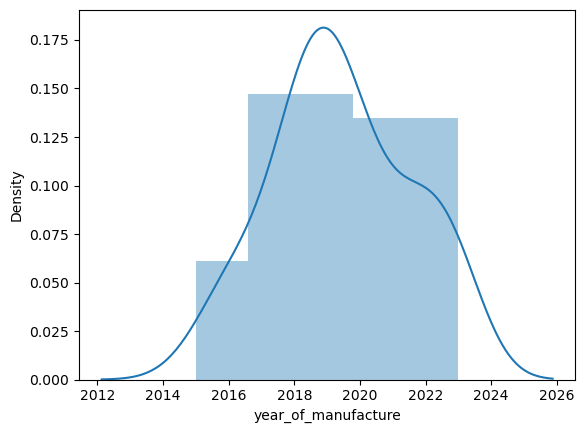

In [170]:
for i in data.columns:
    if data[i].dtypes != 'object':
        sns.distplot(data[i])
        plt.show()

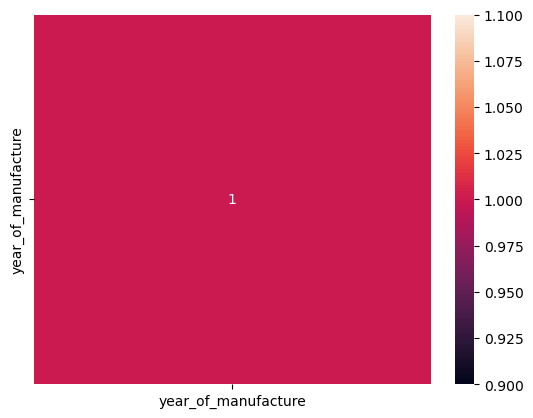

In [172]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

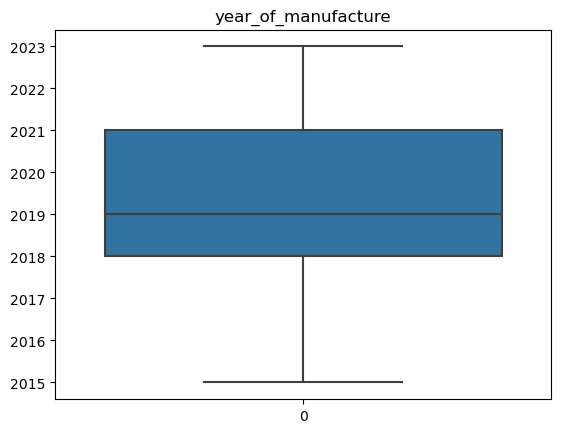

In [174]:
for i in data.columns:
    if data[i].dtypes != object:
        sns.boxplot(data[i])
        plt.title(i)
        plt.show()

In [175]:
data.head()

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make,Model
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram",XT PLUS 2.0L KRYOTEC DARK EDITON,Tata,Harrier
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi",CREATIVE 1.2 RTN DUAL TONE,Tata,PUNCH
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram",XE PETROL,Tata,Tiago
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi",ACCOMPLISHED AMT CAMO EDITION,Tata,PUNCH
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida",XT PETROL,Tata,ALTROZ


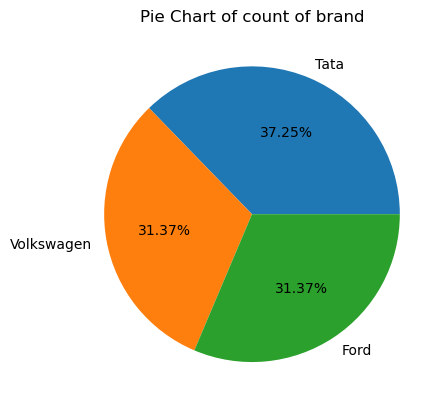

In [184]:
value_counts = data['Make'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct = "%.2f%%")
plt.title(f'Pie Chart of count of brand')
plt.show()

In [179]:
data.head()

,Kilometers_driven,year_of_manufacture,fuel_types,Price,Location,Transmission,Make,Model
0,"27,990 km",2022,Diesel,₹15.52L,"Urbana, Golf Course Ext., Gurugram",XT PLUS 2.0L KRYOTEC DARK EDITON,Tata,Harrier
1,450 km,2022,Petrol,₹8.46L,"atarpur, Delhi",CREATIVE 1.2 RTN DUAL TONE,Tata,PUNCH
2,"6,657 km",2023,Petrol,₹5.36L,"Urbana, Golf Course Ext., Gurugram",XE PETROL,Tata,Tiago
3,"24,589 km",2022,Petrol,₹7.28L,"ro Walk, Rohini, New Delhi",ACCOMPLISHED AMT CAMO EDITION,Tata,PUNCH
4,"85,552 km",2021,Petrol,₹6.07L,"tor-18, Noida",XT PETROL,Tata,ALTROZ


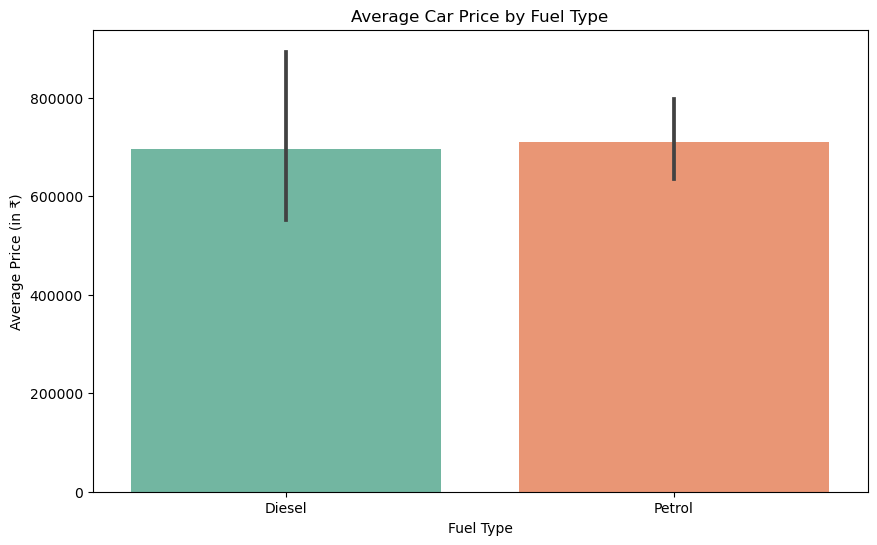

In [203]:
data['Price'] = data['Price'].replace({'₹': '', 'L': ''}, regex=True).astype(float) * 100000

# Bar plot for Average Price by Fuel Type
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_types', y='Price', data=data, estimator='mean', palette='Set2')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (in ₹)')
plt.title('Average Car Price by Fuel Type')
plt.show()

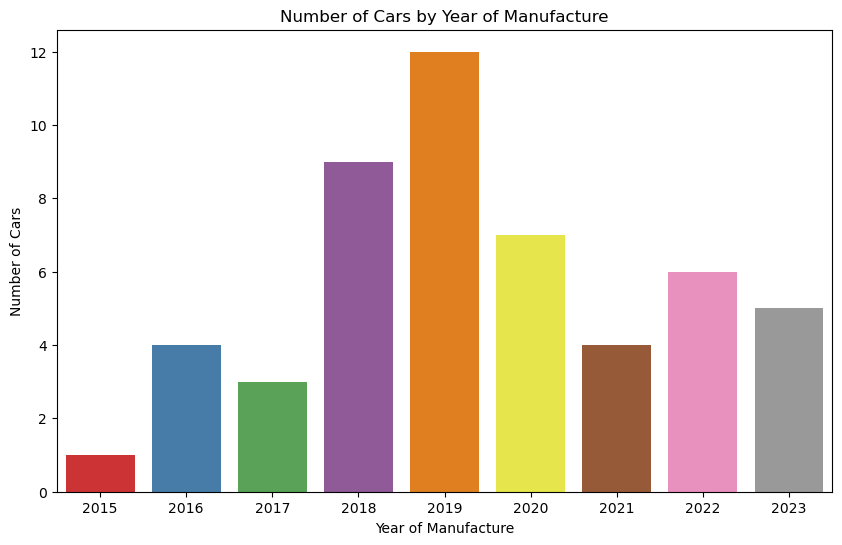

In [204]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year_of_manufacture', data=data, palette='Set1')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Year of Manufacture')
plt.show()


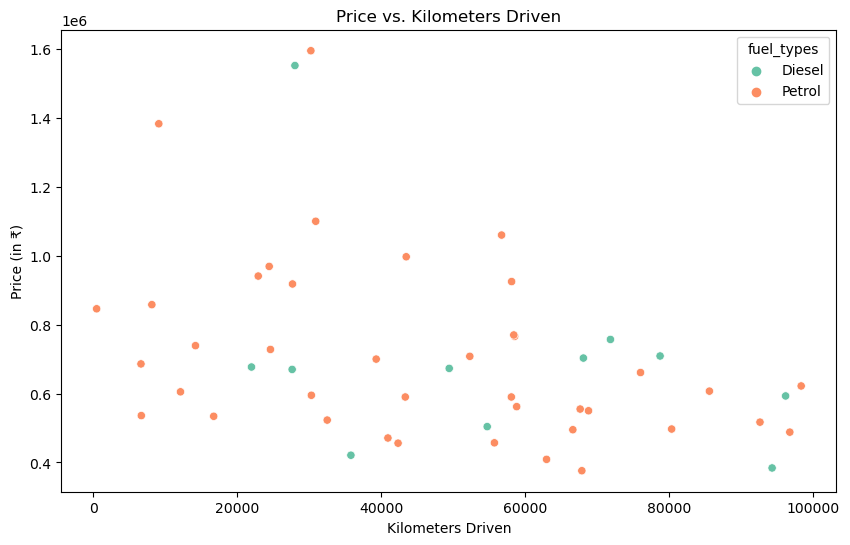

In [205]:
# Convert Kilometers_driven to numeric
data['Kilometers_driven'] = data['Kilometers_driven'].replace({' km': '', ',': ''}, regex=True).astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers_driven', y='Price', hue='fuel_types', data=data, palette='Set2')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in ₹)')
plt.title('Price vs. Kilometers Driven')
plt.show()


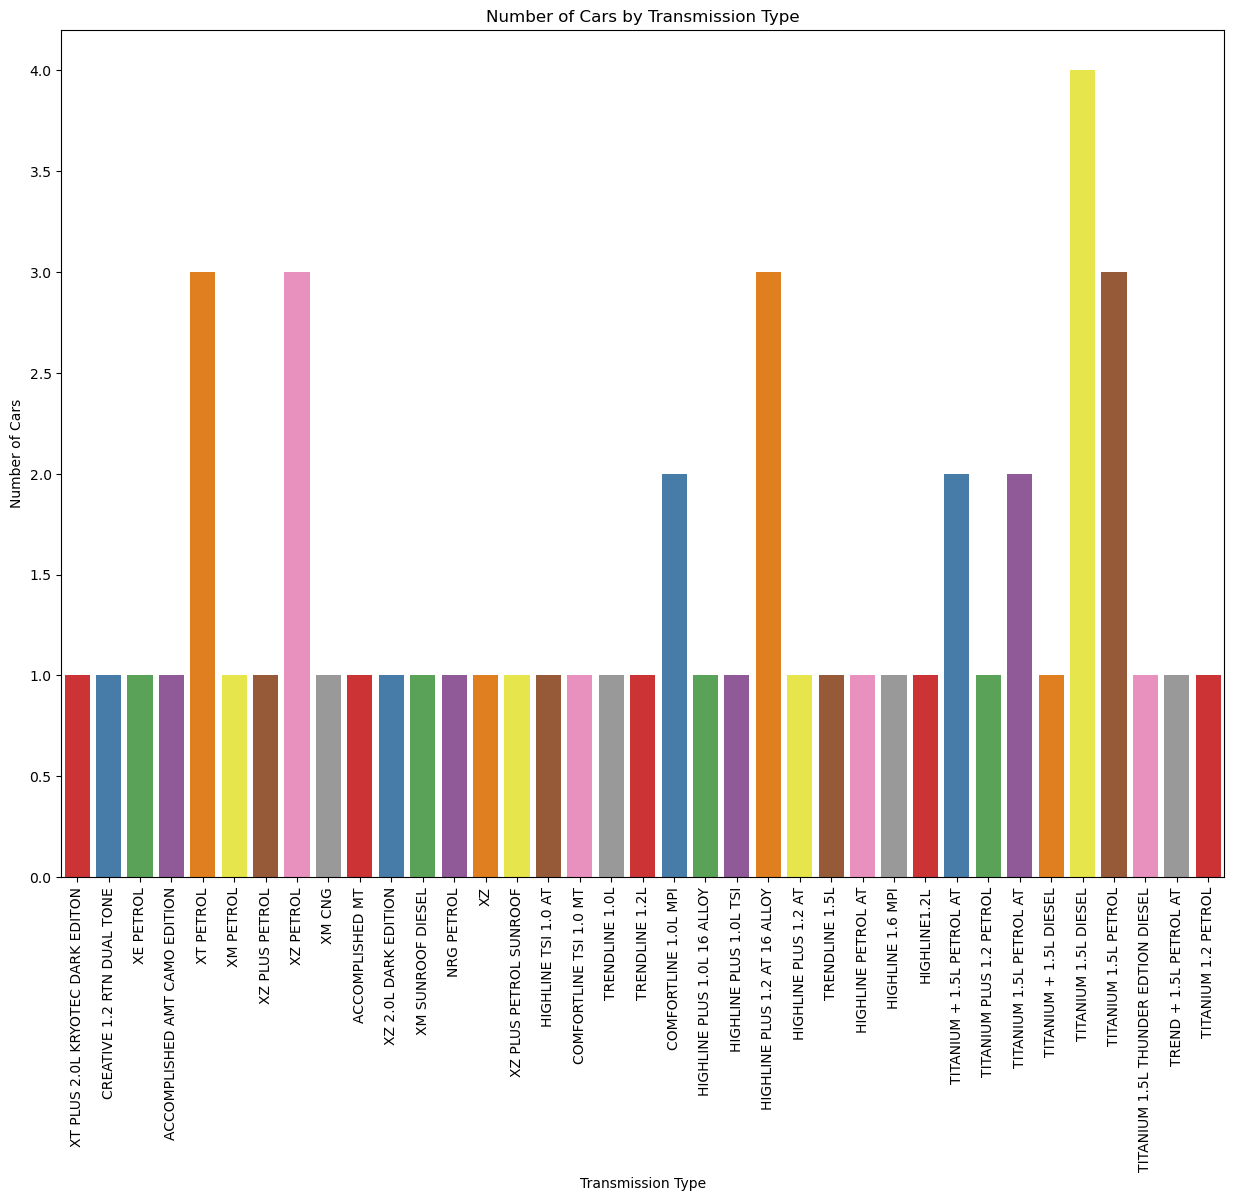

In [210]:
plt.figure(figsize=(15, 11))
sns.countplot(x='Transmission', data=data, palette='Set1')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Transmission Type')
plt.xticks(rotation=90)
plt.show()
